# DATA Analysis - Binder version

#### Libraries

In [4]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import re
from itertools import cycle
import zipfile
#import wx

#### Binder

In order to put our Notebook on binder, we need to copy and paste the packages and version that are used within the notebook. This can be achieved using the following line of code

In [5]:
#%load_ext watermark

In [6]:
#%watermark --iversions

# Data import

Because the data needs to be put in a Git repository, a minimum number of files needs to be imported

In [6]:
spl = 'ASW'

In [7]:
#zf = zipfile.ZipFile('Data.zip')

In [8]:
#zf. namelist()

['Data/DR3_full.csv', 'Data/XP_list_test.csv']

## XP-Ramp

In [9]:
#XP_Ramp_df = pd.read_csv(zf.open('Data/XP_list_test.csv'))
XP_Ramp_df = pd.read_csv('XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

## DR2

In [10]:
#DR2_full_df = pd.read_csv('Data\DR2_full.csv')

## DR3

In [11]:
DR3_full_df = pd.read_csv('DR3_full.csv')

# Scan selection

## Parameter list

In [12]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()
Reduc = ['DR2','DR3']

## Widget selection

In [13]:
#Create Dropdown Box Widget

wR = widgets.SelectMultiple(
    options= Reduc,
    description='Reduction',
    disabled=False,
)

wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    disabled=False,
)

wS = widgets.SelectMultiple(
    options= Sample,
    description='Sample',
    disabled=False,
)

widgets.HBox([wS,wD,wT,wR])



display(wT,wD,wS,wR)

SelectMultiple(description='Temperature:', options=('20K ', '25K', '30K', '40K', '50K', '55K', '60K', '65K', '…

SelectMultiple(description='Date', options=('2020_09_15', '2020_09_16', '2020_09_17', '2020_09_21', '2020_09_2…

SelectMultiple(description='Sample', options=('ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', '…

SelectMultiple(description='Reduction', options=('DR2', 'DR3'), value=())

In [14]:
wT_L = list(wT.value)
wD_L = list(wD.value)

## Sample name construction

In [15]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []

for x in wD_L:
    for y in wT_L:

        value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0]
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })

dat= pd.DataFrame(z)
data_df = dat.set_index('Name')
            

## Plot pre-formating

### Temperature

In [16]:
def Temp_color(row):
    if row['Temp'] == '20K ':
        return int(1)
    if row['Temp'] == '30K ':
        return int(2) 
    elif row['Temp'] == '40K':
        return int(3)
    elif row['Temp'] == '50K':
        return int(4)
    elif row['Temp'] == '60K':
        return int(5)
    elif row['Temp'] == '70K':
        return int(6)
    elif row['Temp'] == '80K':
        return int(7)
    elif row['Temp'] == '90K':
        return int(8)
    elif row['Temp'] == '100K':
        return int(9)
    elif row['Temp'] == '110K':
        return int(10)
    elif row['Temp'] == '120K':
        return int(11)
    elif row['Temp'] == '125K':
        return int(12)
    elif row['Temp'] == '130K':
        return int(13)
    elif row['Temp'] == '132K':
        return int(14)
    elif row['Temp'] == '134K':
        return int(15)
    elif row['Temp'] == '135K':
        return int(16)
    elif row['Temp'] == '136K':
        return int(17)
    elif row['Temp'] == '137K':
        return int(18)
    elif row['Temp'] == '138K':
        return int(19)
    elif row['Temp'] == '140K':
        return int(20)
    elif row['Temp'] == '145K':
        return int(21)
    elif row['Temp'] == '150K':
        return int(21)
    elif row['Temp'] == '155K':
        return int(22)
    elif row['Temp'] == '160K':
        return int(23)
    elif row['Temp'] == '180K':
        return int(24)
    elif row['Temp'] == '200K':
        return int(25)

In [17]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

### Linestyle (date)

In [18]:
linestyle = ['-',':','--']

In [19]:
LD = dict(zip(wD_L, linestyle))

data_df['linestyle'] = data_df['Date'].map(LD)

### Sanity Check

In [20]:
data_df

,Temp,Date,Colour,linestyle
Name,,,,
ASW_2020_09_15_1,20K,2020_09_15,1,-
ASW_2020_09_16_1,20K,2020_09_16,1,:
ASW_2020_09_16_2,20K,2020_09_16,1,:
ASW_2020_09_17_1,20K,2020_09_17,1,--
ASW_2020_09_17_2,20K,2020_09_17,1,--


# Plotting

5


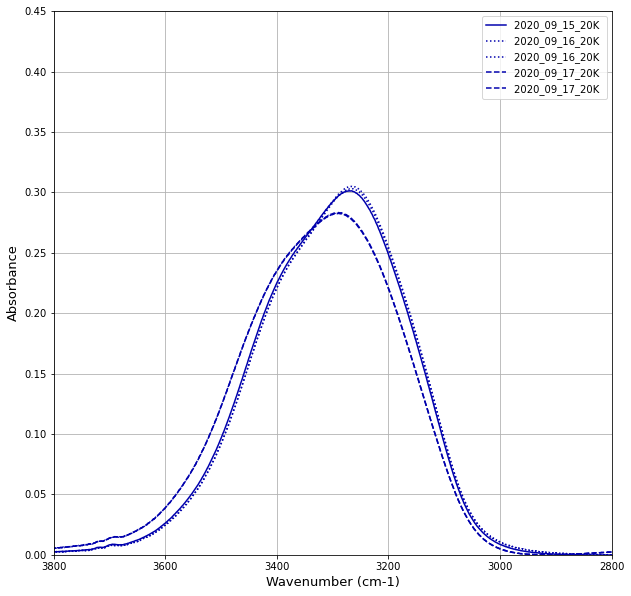

In [21]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

#colors = sns.color_palette("coolwarm", data_df.Temp.nunique())
#ax.set_prop_cycle('color', colors)

#ax.set_prop_cycle(color =['b', 'g'])
#cc = (cycler(linestyle=['-', '--', '-.', ]))

for i in dat['Name']:
    
#DR2
    
    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

#`DR3

    x = DR3_full_df.Wavenumber
    y = DR3_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), c=cm.jet(int(data_df.loc[i]['Colour'])/25), linestyle=(data_df.loc[i]['linestyle'])) 


#plt.title('{0} DR3 '.format(date))
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()